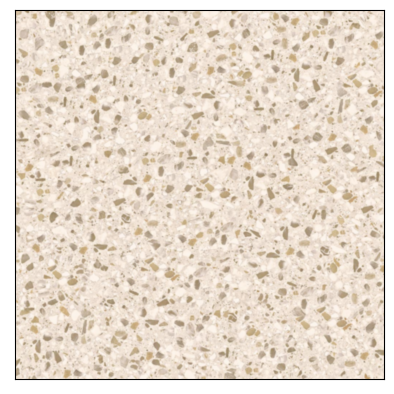

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./terrazzo.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, interpolation = 'bicubic')
#plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

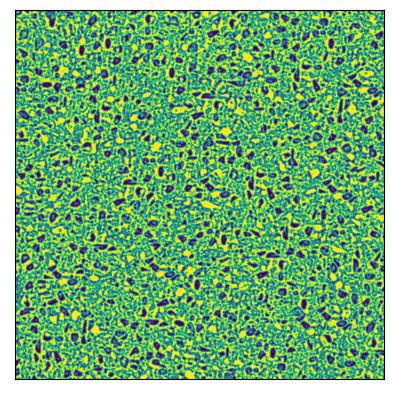

In [27]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img = cv2.imread('./terrazzo.png',0)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
plt.imshow(th2, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

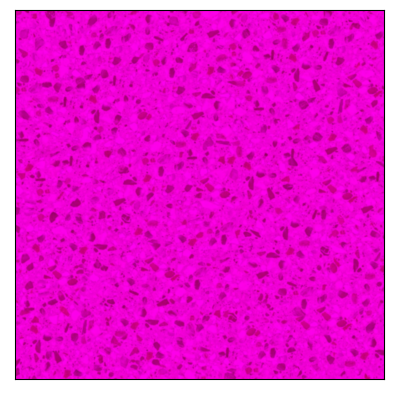

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def set_rgb(image, set_r, set_g, set_b):
    for r in image:
        for p in r:
            if set_r >= 0: p[0] = set_r
            if set_g >= 0: p[1] = set_g
            if set_b >= 0: p[2] = set_b

img = cv2.imread('./terrazzo.png')
image1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

set_rgb(image1, -1, 0, -1)

        
plt.imshow(image1, interpolation = 'bicubic')
#plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
import cv2

road = cv2.imread('./terrazzo.png')
gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
th = 150

frames = []
step = 10

best_case = [0, 0]
min_metric = float("inf")

for k in range(10):
    for i in range(255-(step*(1+k))):
        frame = cv2.inRange(gray, i, i+(step*(1+k)))
        w_sum = int(frame.sum()/255)
        w_sum_str = str(int(w_sum/1000)/1000)+'M' if w_sum > 1000000 else str(int(w_sum/1000))+'K'
        b_sum = int((1024*1024) - frame.sum()/255)
        b_sum_str = str(int(b_sum/1000)/1000)+'M' if b_sum > 1000000 else str(int(b_sum/1000))+'K'
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        frame = cv2.putText(frame, 'STEP: '+str((step*(1+k))), (30, 100), cv2.FONT_HERSHEY_PLAIN, 5, (0, 255, 0), thickness = 3, lineType = cv2.LINE_AA)
        frame = cv2.putText(frame, 'IDX: '+str(i), (30, 200), cv2.FONT_HERSHEY_PLAIN, 5, (0, 255, 0), thickness = 3, lineType = cv2.LINE_AA)
        frame = cv2.putText(frame, w_sum_str, (30, 300), cv2.FONT_HERSHEY_PLAIN, 5, (0, 255, 0), thickness = 3, lineType = cv2.LINE_AA)
        frame = cv2.putText(frame,b_sum_str, (30, 400), cv2.FONT_HERSHEY_PLAIN, 5, (0, 255, 0), thickness = 3, lineType = cv2.LINE_AA)
        metric = abs(w_sum - b_sum)/1000
        frame = cv2.putText(frame,str(metric)+'K', (30, 500), cv2.FONT_HERSHEY_PLAIN, 5, (0, 255, 0), thickness = 3, lineType = cv2.LINE_AA)
        frames.append(frame)
        if min_metric > metric:
            min_metric = metric
            best_case[0] = i
            best_case[1] = (step*(1+k))
            best_image = frame
        
print(best_case[0], best_case[1])
        
for frame in frames:
    cv2.imshow("terazzo",frame)
    if cv2.waitKey(25) == ord('q'):
        print("동영상 종료")
        break
        
best_image = cv2.putText(best_image,'BEST_CASE', (30, 600), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 255), thickness = 3, lineType = cv2.LINE_AA)
cv2.imshow("terazzo",best_image)

cv2.waitKey()
cv2.destroyAllWindows()

194 40


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./terrazzo.png')
# 이진 이미지로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("terazzo",gray)

cv2.waitKey()
cv2.destroyAllWindows()

-1

245.0 201.0 53.0 203.0


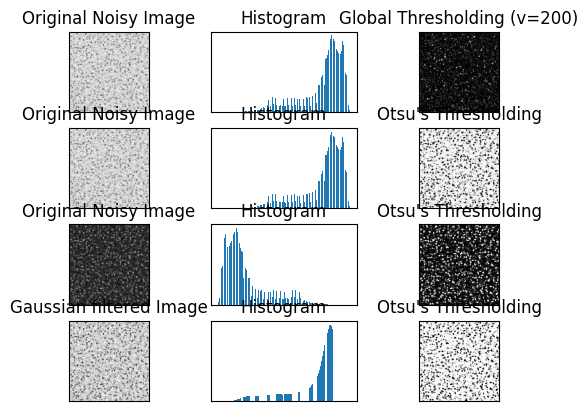

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./terrazzo.png', 0)
img2 = np.invert(img)
# 임계치를 127로 지정한 경우
ret1,th1 = cv2.threshold(img, 245, 255, cv2.THRESH_BINARY)
ret5,th5 = cv2.threshold(img2, 55, 255, cv2.THRESH_BINARY)
# Otsu 방법으로 임계치를 내부적으로 계산하여 지정한 경우
ret2,th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret4,th4 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 잡음 감소를 위해 Gaussian filtering 연산 후 Otsu 방법으로 임계치를 계산한 경우
blur = cv2.GaussianBlur(img, (5,5), 0)
ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret1, ret2, ret4, ret3)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          img2, 0, th4,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=200)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(4):
    plt.subplot(4,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./terrazzo.png', 0)
img2 = np.invert(img)
# 임계치를 127로 지정한 경우
ret1,th1 = cv2.threshold(img, 235, 255, cv2.THRESH_BINARY)
ret5,th5 = cv2.threshold(img2, 55, 255, cv2.THRESH_BINARY)
# Otsu 방법으로 임계치를 내부적으로 계산하여 지정한 경우
ret2,th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret4,th4 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 잡음 감소를 위해 Gaussian filtering 연산 후 Otsu 방법으로 임계치를 계산한 경우
blur = cv2.GaussianBlur(img, (5,5), 0)
ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((5,5), np.uint8) 
result = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)
result2 = cv2.morphologyEx(th5, cv2.MORPH_OPEN, kernel)

while True:
    cv2.imshow("terazzo",result + result2)
    if cv2.waitKey() == ord('q'): break
    cv2.imshow("terazzo",th2)
    if cv2.waitKey() == ord('q'): break
    cv2.imshow("terazzo",th4)
    if cv2.waitKey() == ord('q'): break

cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2
img = cv2.imread('./terrazzo.png')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(gray,235,255,0)
thresh = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

cnt = contours[0]

result = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

for idx, c in enumerate(contours):
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    result = cv2.drawContours(result,[box],0,(0,0,255),2)
    print(idx)

cv2.imshow('img', result)
cv2.waitKey()
cv2.destroyAllWindows()

#cv2.imshow('thresh', thresh)
#k = cv2.waitKey()    
#cv2.destroyAllWindows()

32848
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
27696
27697
27698
27699
27700
27701
27702
27703
27704
27705
27706
27707
27708
27709
27710
27711
27712
27713
27714
27715
27716
27717
27718
27719
27720
27721
27722
27723
27724
27725
27726
27727
27728
27729
27730
27731
27732
27733
27734
27735
27736
27737
27738
27739
27740
27741
27742
27743
27744
27745
27746
27747
27748
27749
27750
27751
27752
27753
27754
27755
27756
27757
27758
27759
27760
27761
27762
2776

In [14]:
# GRAY -> OTSU -> Bitwise OTSU -> Overlap -> Contour -> Noise Fillter by Squere's Area -> Pixel Mesure